## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

from scipy import stats
from scipy.stats import norm, skew
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Loading Datasets

In [2]:
df_train = pd.read_csv('C:/Users/ZASHANK/Downloads/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('C:/Users/ZASHANK/Downloads/house-prices-advanced-regression-techniques/test.csv')

#### Displaying the first 5 records of train data

In [3]:
print('Train data:',df_train.head(5))
print(100*'-')
print('Test data:',df_test.head(5))

Train data:    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008 

#### Cheking the shape of train and test data

In [4]:
print('Train dataset shape:',df_train.shape)
print(100*'-')
print('Test dataset shape:',df_test.shape)

Train dataset shape: (1460, 81)
----------------------------------------------------------------------------------------------------
Test dataset shape: (1459, 80)


#### Cheking the basic info about train and test data

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Data Processing

#### Scatter plot for checking the outliers between GrLivArea and SalePrice.

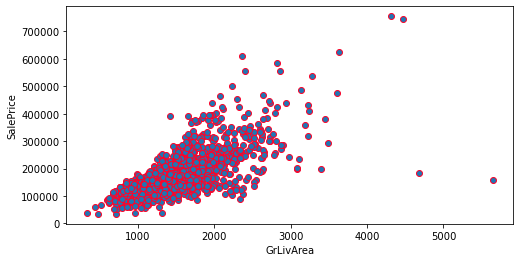

In [7]:
#Creating subplots
fig,plot1 = plt.subplots(figsize = (8,4))

#Create scatter plots
plot1.scatter(x = df_train['GrLivArea'],y = df_train['SalePrice'],edgecolors = '#fc052a')
plt.xlabel('GrLivArea', fontsize = 10)
plt.ylabel('SalePrice', fontsize = 10)
plt.show()

In [8]:
# As can be seen, the some prices at the right side of the plot has very low price.

In [9]:
#### Removing the outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>3000) & (df_train['SalePrice']<400000)].index)

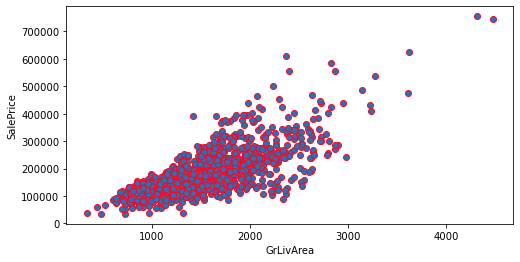

In [10]:
#Checking again
#Creating subplots
fig,plot1 = plt.subplots(figsize = (8,4))

#Create scatter plots
plot1.scatter(x = df_train['GrLivArea'],y = df_train['SalePrice'],edgecolors = '#fc052a')
plt.xlabel('GrLivArea', fontsize = 10)
plt.ylabel('SalePrice', fontsize = 10)
plt.show()

#### Checking the outliers by plotting Boxplot for GrLivArea

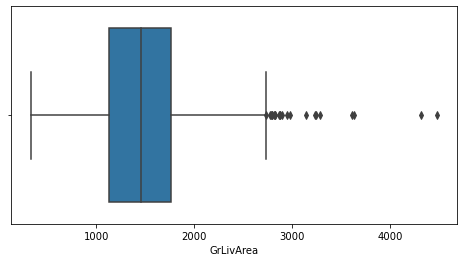

In [11]:
#Creating subplots
fig,plot2 = plt.subplots(figsize = (8,4))

#Creating Boxplot
sns.boxplot(x = df_train.GrLivArea)

plt.xlabel('GrLivArea',fontsize = 10)
plt.show()

In [12]:
#### Again removing the outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>2600)].index)

#### Checking the outliers by plotting Boxplot for GrLivArea

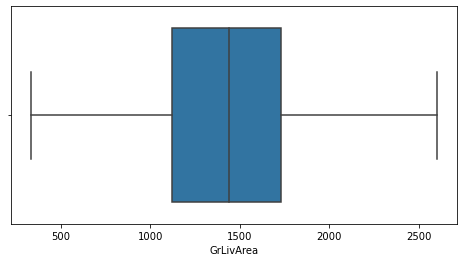

In [13]:
#Creating subplots
fig,plot2 = plt.subplots(figsize = (8,4))

#Creating Boxplot
sns.boxplot(x = df_train.GrLivArea)

plt.xlabel('GrLivArea',fontsize = 10)
plt.show()

In [14]:
#Now there is no outliers in GrLivArea field 

#### Checking the skewness of SalePrice field.


 mu = 174572.70 and sigma = 68953.85



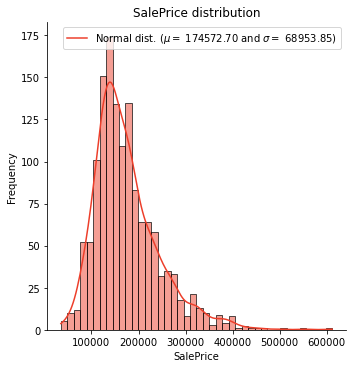

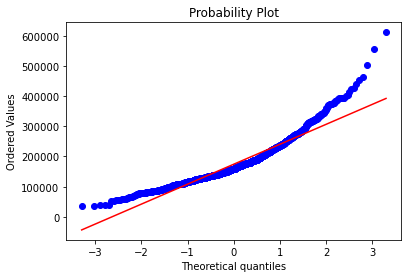

In [15]:
sns.displot(df_train['SalePrice'],color = '#ed3e2a',kde = True)

#Get the fitted parameters used by the function
(mu,sigma) = norm.fit(df_train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu,sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'],plot=plt)
plt.show()
# Below can be seen that the target variable has right skewed data which needs to be treated

<AxesSubplot:ylabel='Frequency'>

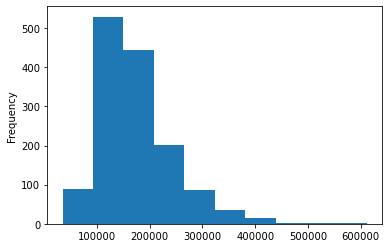

In [16]:
df_train.SalePrice.plot(kind = 'hist')
#Skeweness is there on the right side

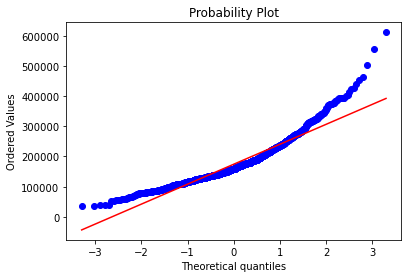

In [17]:
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'],plot=plt)
plt.show()

#### Applying log transformation of the target variable.

In [18]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

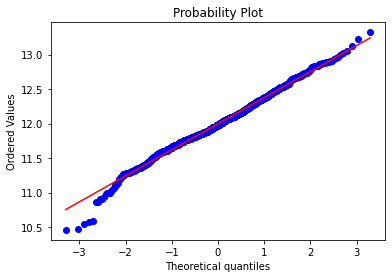

In [19]:
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'],plot=plt)
plt.show()


 mu = 12.00 and sigma = 0.38



Text(0.5, 1.0, 'SalePrice distribution')

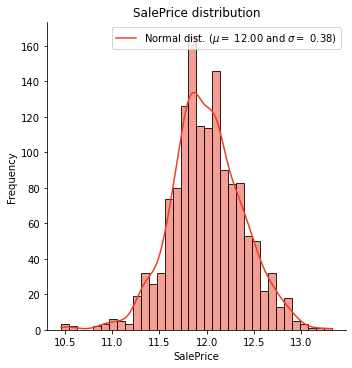

In [20]:
sns.displot(df_train['SalePrice'],kde = True,color = '#ed3e2a')
#sns.distplot(df_train['SalePrice'], kde = False, color ='red', bins = 30)
#Get the fitted parameters used by the function
(mu,sigma) = norm.fit(df_train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu,sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#### Saving the Id column into some other variable and then dropping it as its unnecessary for the prediction

In [21]:
train_id = df_train['Id']
test_id = df_test['Id']

print(train_id.shape,'\t',test_id.shape)

(1407,) 	 (1459,)


In [22]:
df_train.drop(['Id'],axis = 1,inplace =True)
df_test.drop(['Id'],axis = 1,inplace =True)

## Concating the data of train and test.

In [23]:
df_train.shape

(1407, 80)

In [24]:
df_test.shape

(1459, 79)

In [25]:
df_all = pd.concat((df_train,df_test)).reset_index(drop = True)

In [26]:
df_all.shape

(2866, 80)

In [27]:
Target = df_all['SalePrice'][:1407]
Target

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1402    12.072547
1403    12.254868
1404    12.493133
1405    11.864469
1406    11.901590
Name: SalePrice, Length: 1407, dtype: float64

In [28]:
#Dropping the Sale Price column from df_all
df_all.drop(['SalePrice'],axis = 1,inplace = True)

In [29]:
df_all.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [30]:
# Now checking for the missing values

In [31]:
df_na = (df_all.isnull().sum()/len(df_all))*100
df_na

MSSubClass        0.000000
MSZoning          0.139567
LotFrontage      16.643405
LotArea           0.000000
Street            0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.034892
SaleCondition     0.000000
Length: 79, dtype: float64

In [32]:
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending = False)
df_na

PoolQC          99.790649
MiscFeature     96.441033
Alley           93.196092
Fence           80.390789
FireplaceQu     49.441731
LotFrontage     16.643405
GarageFinish     5.478018
GarageQual       5.478018
GarageCond       5.478018
GarageYrBlt      5.478018
GarageType       5.408234
BsmtExposure     2.861130
BsmtCond         2.861130
BsmtQual         2.826239
BsmtFinType2     2.791347
BsmtFinType1     2.756455
MasVnrType       0.837404
MasVnrArea       0.802512
MSZoning         0.139567
BsmtFullBath     0.069784
BsmtHalfBath     0.069784
Functional       0.069784
Utilities        0.069784
GarageArea       0.034892
GarageCars       0.034892
Electrical       0.034892
KitchenQual      0.034892
TotalBsmtSF      0.034892
BsmtUnfSF        0.034892
BsmtFinSF2       0.034892
BsmtFinSF1       0.034892
Exterior2nd      0.034892
Exterior1st      0.034892
SaleType         0.034892
dtype: float64

In [33]:
missing_data = pd.DataFrame({'Missing Ratio':df_na})
missing_data.head(5)

,Missing Ratio
PoolQC,99.790649
MiscFeature,96.441033
Alley,93.196092
Fence,80.390789
FireplaceQu,49.441731


#### Plotting the barplot for the missing data

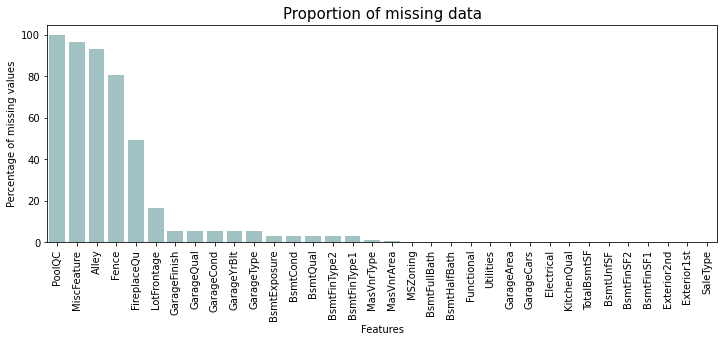

In [34]:
#Create Subplots
fig,plot3 = plt.subplots(figsize = (12,4))
plt.xticks(rotation = '90')

#Creating Barplot
sns.barplot(x = df_na.index,y = df_na,color = '#9bc7c9')
plt.xlabel('Features',fontsize = 10)
plt.ylabel('Percentage of missing values',fontsize = 10)
plt.title('Proportion of missing data',fontsize = 15)
plt.show()

#### Checking the data correlation of train 

<AxesSubplot:>

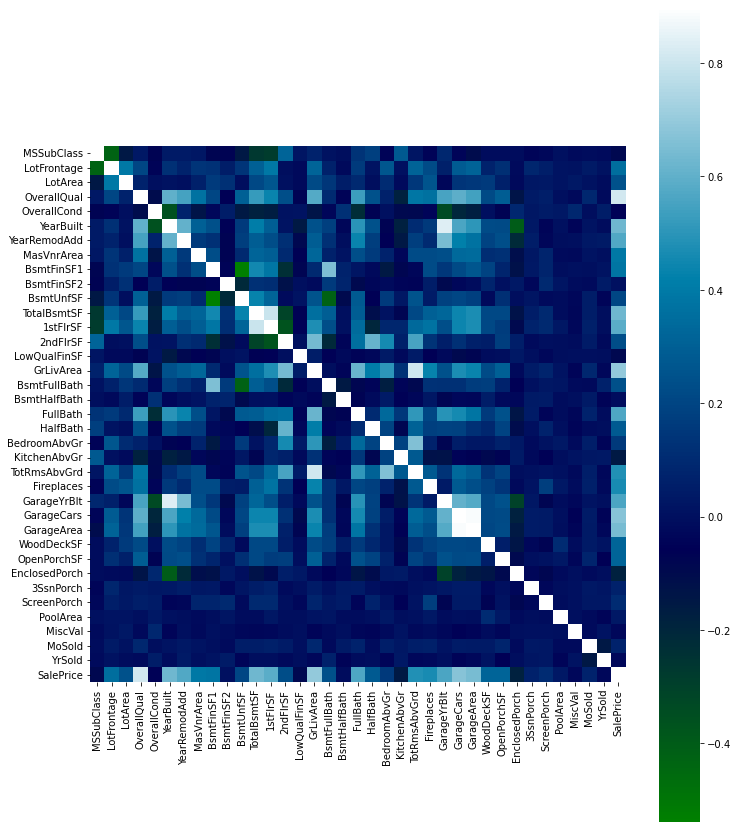

In [35]:
#Correlation map to see how features are correlated with SalePrice

corr_data = df_train.corr()
plt.subplots(figsize = (12,15))
sns.heatmap(corr_data,vmax = 0.9,square =True,cmap = 'ocean',linecolor = '#4efc14')

## Treating the missing values

In [36]:
#Now we will drop those columns which have more than 40% missing data

In [37]:
df_all.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis = 1,inplace = True)

In [38]:
df_all

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2861,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
2862,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2863,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
2864,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [39]:
df_all.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      477
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 74, dtype: int64

In [40]:
df_all.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [41]:
df_all['LotFrontage'].mode()

0    60.0
Name: LotFrontage, dtype: float64

In [42]:
df_all['LotFrontage'].mean()

68.8133110087903

In [43]:
df_all['LotFrontage'].fillna(60,inplace = True)

In [44]:
df_all['LotFrontage'].mean()

67.34647592463364

GarageFinish     5.478018
GarageQual       5.478018
GarageCond       5.478018
GarageYrBlt      5.478018
GarageType       5.408234
BsmtExposure     2.861130
BsmtCond         2.861130
BsmtQual         2.826239
BsmtFinType2     2.791347
BsmtFinType1     2.756455

In [45]:
col = ['GarageFinish','GarageQual','GarageCond','GarageYrBlt',
       'GarageType','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1']
for x in col:
    df_all[x].fillna(df_all[x].mode(),inplace = True)

In [46]:
# Now since all the other fields has less than 1 % missing data. I am using ffill method to replace null values
df_all.fillna(method = 'ffill',inplace = True)

In [47]:
# Now again checking for the missing values
df_na = (df_all.isnull().sum()/len(df_all))*100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Ratio':df_na})
missing_data.head(5)

,Missing Ratio


In [48]:
# So all the missing value has been treated

## Feature Engineering

In [49]:
# Transforming some numerical values that are actually having categorical data
col2 = ['YrSold','MoSold','OverallCond','MSSubClass']
for  x in col2:
    df_all[x].apply(str)

In [50]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2866 entries, 0 to 2865
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2866 non-null   int64  
 1   MSZoning       2866 non-null   object 
 2   LotFrontage    2866 non-null   float64
 3   LotArea        2866 non-null   int64  
 4   Street         2866 non-null   object 
 5   LotShape       2866 non-null   object 
 6   LandContour    2866 non-null   object 
 7   Utilities      2866 non-null   object 
 8   LotConfig      2866 non-null   object 
 9   LandSlope      2866 non-null   object 
 10  Neighborhood   2866 non-null   object 
 11  Condition1     2866 non-null   object 
 12  Condition2     2866 non-null   object 
 13  BldgType       2866 non-null   object 
 14  HouseStyle     2866 non-null   object 
 15  OverallQual    2866 non-null   int64  
 16  OverallCond    2866 non-null   int64  
 17  YearBuilt      2866 non-null   int64  
 18  YearRemo

In [51]:
# Label Encoding some categorical values in their ordering set
from sklearn.preprocessing import LabelEncoder
col4 = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'
       ]
for c in col4:
    LE = LabelEncoder()
    LE.fit(list(df_all[c].values))
    df_all[c]=LE.transform(list(df_all[c].values))

In [52]:
df_all.shape

(2866, 74)

In [53]:
train = df_all[:1407]

In [54]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,41,619,1,3,3,0,4,0,...,52,0,0,0,0,0,1,2,8,4
1,0,3,56,893,1,3,3,0,2,0,...,0,0,0,0,0,0,4,1,8,4
2,5,3,44,1260,1,0,3,0,4,0,...,33,0,0,0,0,0,8,2,8,4
3,6,3,36,882,1,0,3,0,0,0,...,26,157,0,0,0,0,1,0,8,0
4,5,3,60,1652,1,0,3,0,2,0,...,73,0,0,0,0,0,11,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,5,3,38,500,1,3,3,0,4,0,...,31,0,0,0,0,0,7,1,8,4
1403,0,3,61,1556,1,3,3,0,4,0,...,0,0,0,0,0,0,1,4,8,4
1404,6,3,42,758,1,3,3,0,4,0,...,51,0,0,0,0,28,4,4,8,4
1405,0,3,44,914,1,3,3,0,4,0,...,0,60,0,0,0,0,3,4,8,4


In [55]:
test = df_all[1407:]
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1407,0,2,56,1322,1,3,3,0,4,0,...,0,0,0,26,0,0,5,4,8,4
1408,0,3,57,1653,1,0,3,0,0,0,...,27,0,0,0,0,33,5,4,8,4
1409,5,3,50,1619,1,0,3,0,4,0,...,25,0,0,0,0,0,2,4,8,4
1410,5,3,54,977,1,0,3,0,4,0,...,27,0,0,0,0,0,5,4,8,4
1411,11,3,19,178,1,0,1,0,4,0,...,71,0,0,39,0,0,0,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2861,13,4,0,23,1,3,3,0,4,0,...,0,0,0,0,0,0,5,0,8,4
2862,13,4,0,20,1,3,3,0,4,0,...,15,0,0,0,0,0,3,0,8,0
2863,0,3,120,1834,1,3,3,0,4,0,...,0,0,0,0,0,0,8,0,8,0
2864,9,3,38,1087,1,3,3,0,4,0,...,23,0,0,0,0,17,6,0,8,4


In [56]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [57]:
# Splitting the Train and Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train,Target,test_size = .3,random_state = 100)

In [58]:
# Fitting & transforming the data:
SS= StandardScaler()
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)
x_train = SS.fit_transform(x_train)
x_test = SS.fit_transform(x_test)
y_train =SS.fit_transform(y_train)
y_test = SS.fit_transform(y_test)

### Linear Regression

In [59]:
#fitting the data in linear regression
LR= LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

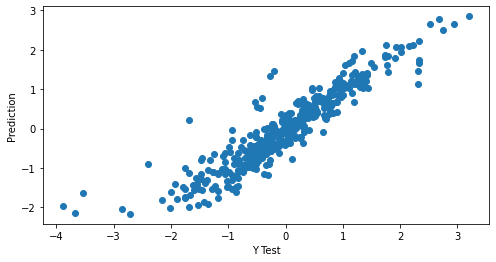

In [60]:
# Evaluating the Algorithm
plt.figure(figsize=(8,4))
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

#### Mean Absolute Error Calculation

In [61]:
#calculating MAE(Mean Absolute Error), MSE(Mean Square Error), & RMSE(Root Mean Square Error)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.25919230124173287
Mean Square Error: 0.1464646438656236
Root Mean Square Error: 0.3827069947957884


### Decision Tree Regression

In [62]:
#Decision Tree Regression
classifier= DecisionTreeRegressor(random_state = 100)
classifier.fit(x_train, y_train)

DecisionTreeRegressor(random_state=100)

In [63]:
y_pred1 = classifier.predict(x_test)

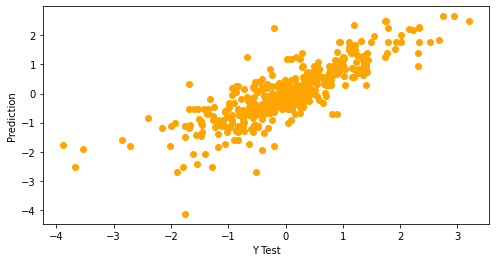

In [64]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,y_pred1,c='orange')
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

In [65]:
#calculating MAE(Mean Absolute Error), MSE(Mean Square Error), & RMSE(Root Mean Square Error)
print('Mean Absolute Erorr:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Square Erorr:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Erorr: 0.4303864206899253
Mean Square Erorr: 0.338054870286982
Root Mean Square Error: 0.5814248621163203


### Random Forest Regression

In [66]:
#Random Forest Regression
RFReg = RandomForestRegressor(n_estimators = 100, random_state = 101)
RFReg.fit(x_train, y_train)

RandomForestRegressor(random_state=101)

In [67]:
y_pred2 = RFReg.predict(x_test)

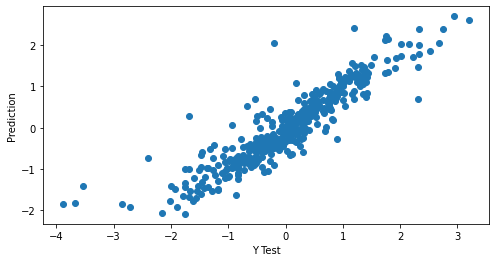

In [68]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,y_pred2)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

In [69]:
#calculating MAE(Mean Absolute Error), MSE(Mean Square Error), & RMSE(Root Mean Square Error)
print('Mean Absolute Erorr:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Square Erorr:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Erorr: 0.2707755719877679
Mean Square Erorr: 0.17042554336056218
Root Mean Square Error: 0.41282628714819286


In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Conclusion

Out of DecisionTree Regression,Random Forest Regression and Linear Regression, the Linear Regression performs well as its has shown least mean square error, which is less than the other two methods

In [ ]:
result = RFReg.predict(test)
result.shape

In [ ]:
result = result.flatten()

In [ ]:
result

In [ ]:
submission_HP = pd.DataFrame({'Id':test_id,'SalePrice':result})
submission_HP.to_csv('Desktop/submission_hp1.csv',index = False)